# STAT207 Final Project - Penguins in Antarctica

Karena Liang, Trishla Nair, Ken Ogata

In [63]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import f
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Introduction

One of the most common places to find penguins is within Antarctica. But for a long time now, penguins have been classified as an endangered species. To bring awareness upon penguin endangerment, we can analyze data about three specific penguin species: the Gentoo, the Adelie, and the Chinstrap penguins. The chosen data was collected through a study conducted in the islands of the Palmer Archipelago, Antarctica, from 2007 to 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. We will be analyzing the data with the following questions in mind:
1. 
2.
3.
4.

Our research may be of interest to those who are passionate about wildlife conservation and environmental sustainability efforts. By analyzing the data, we can gain possible insight into species diversity, habitat security, population trends, etc. in order to better understand the current state.


In [82]:
df = pd.read_csv("https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv", na_values=".")
df.dropna(inplace=True)
df.drop('rowid', axis=1, inplace=True)
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


In [83]:
df.shape

(333, 8)

Regarding other considerations, we acknowledge limitations such as the recency of the data - the data was collected over a decade ago, thus it may or may not be completely accurate when applied to the current situation. The study was done as ethically as possible in the way that the penguins were not harmed, but it was still ethically harmful in terms of the invasive nature of the sampling. The study description includes that study nests were individually marked and chosen before the onset of egg laying to consistent monitor and sample for blood. 
After handling, the individuals were further monitored to ensure the pair reached clutch completion, i.e., two eggs. The species were represented equally as possible, but there will always be varying environmental factors; the study had a reduced sample size for chinstraps due to overall smaller number of individuals breeding at rookeries on Dream Island.

## 2. Descriptive Analytics

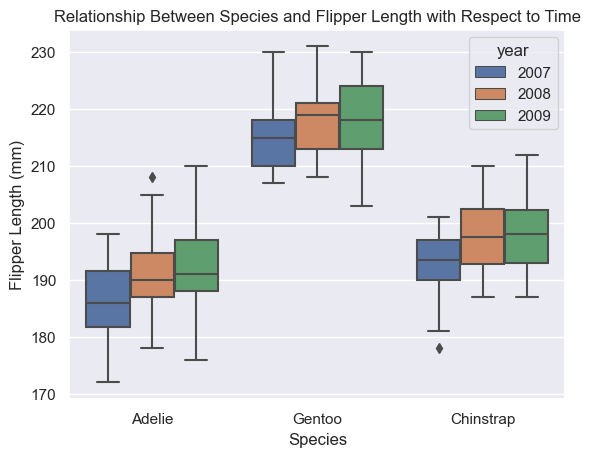

In [84]:
sns.boxplot(x="species", y="flipper_length_mm", hue="year", data=df)
plt.title("Relationship Between Species and Flipper Length with Respect to Time")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

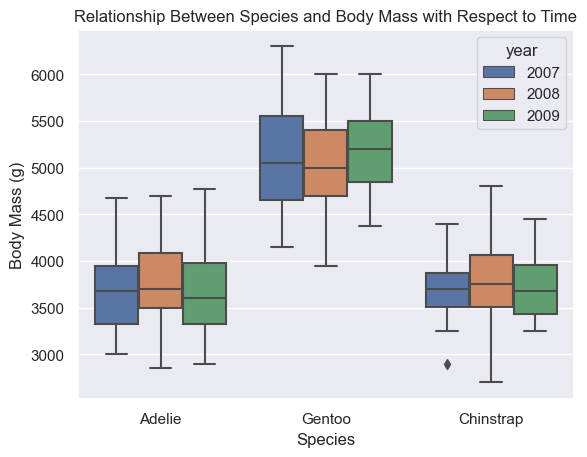

In [85]:
sns.boxplot(x="species", y="body_mass_g", hue="year", data=df)
plt.title("Relationship Between Species and Body Mass with Respect to Time")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()

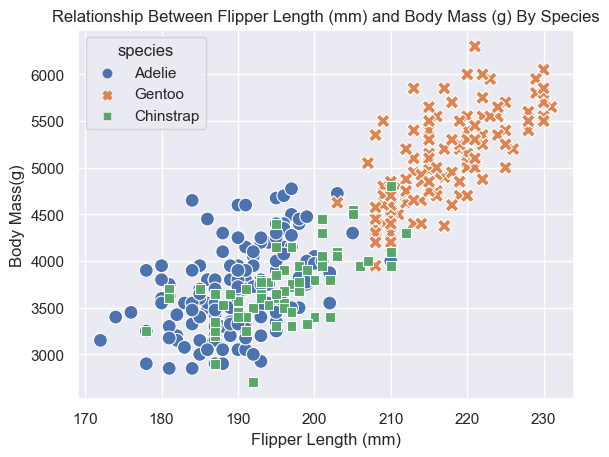

In [86]:
import seaborn as sns

sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', style='species', s=100)
plt.title('Relationship Between Flipper Length (mm) and Body Mass (g) By Species')
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass(g)")
plt.show()


## 3. Inference

## 4. Linear Regression

### How well can we predict the body mass of penguins based on their bill length, bill depth, flipper length, and sex using linear regression?

In [87]:
linMod = smf.ols('body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + sex', data=df).fit()
print(linMod.summary())
print("-----------")
print("Our Fitted Linear Regression Model: ")
print("yhat = -2288.4650 + 541.0285*sex - 2.3287*bill_length_mm - 86.0882*bill_depth_mm + 38.8258*flipper_length_mm")

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          6.28e-122
Time:                        13:44:01   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.58

**Assumptions**<br>
Line: This condition is satisfied as the points look like they’re evenly scattered across the fitted vs. residuals line.<br>
Independence: As stated in the study, the data was randomly sampled and a sample of 333 penguins are likely less than 10% of the total population of Palmer penguins.<br>
Normality: the residuals do seem normally distributed, thus this condition is satisfied as well. <br>
Equal Variance: This condition is plausible as the observations have similar scatter at most fitted values.<br>
Multicollinearity: Considering the nonlinear relationships between multiple variables, our condition is not met, but we will proceed with caution.


<u>**Condition 1**</u>: **Linearity Condition** <br>
Since the distribution of points in the plot below are roughly evenly distributed above and below the line
as we move from left to right, we can say the linearity condition is met.

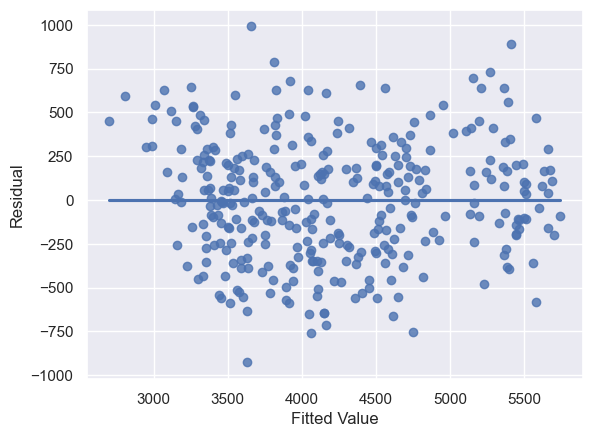

In [88]:
sns.regplot(x=linMod.fittedvalues, y=linMod.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

<u>**Condition 2**</u>: **Constant Variability of Residuals Condition** <br>
Since the y‑axis spread of points in the plot below stays similar as we move from left to right, we can say that this condition is met.

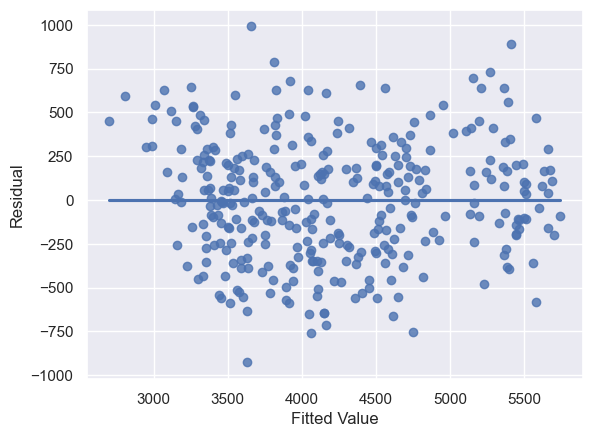

In [89]:
sns.regplot(x=linMod.fittedvalues, y=linMod.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

<u>**Condition 3**</u>: **Normality of Residuals Condition** <br>
Since the y‑axis spread of points in the plot below stays similar as we move from left to right, we can say that this condition is met.

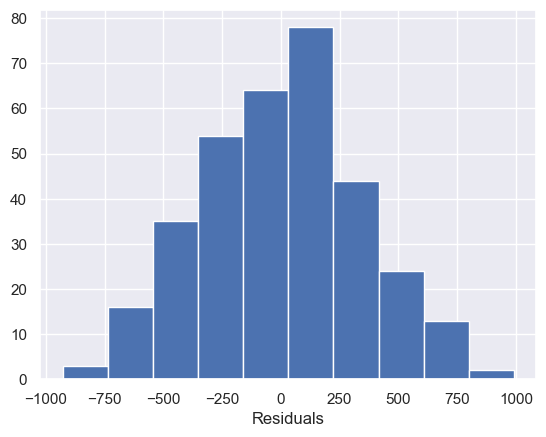

In [90]:
plt.hist(linMod.resid)
plt.xlabel('Residuals')
plt.show()

<u>**Condition 4**</u>: **Independence of Residuals Condition** <br>
The data is randomly sampled (as provided in the study) and the sample size n=333<10% of all Palmers Penguins.
Thus the condition for independence of residuals are valid.

In [91]:
print("Independence:", len(df), "< 10% of population size N")

Independence: 333 < 10% of population size N


<u>**Condition 5**</u>: **Multicollinearity Condition** <br>
The pairplots below show that the multicollinearity condition is not met, as there are multiple pairs of variables that are linearly associated.

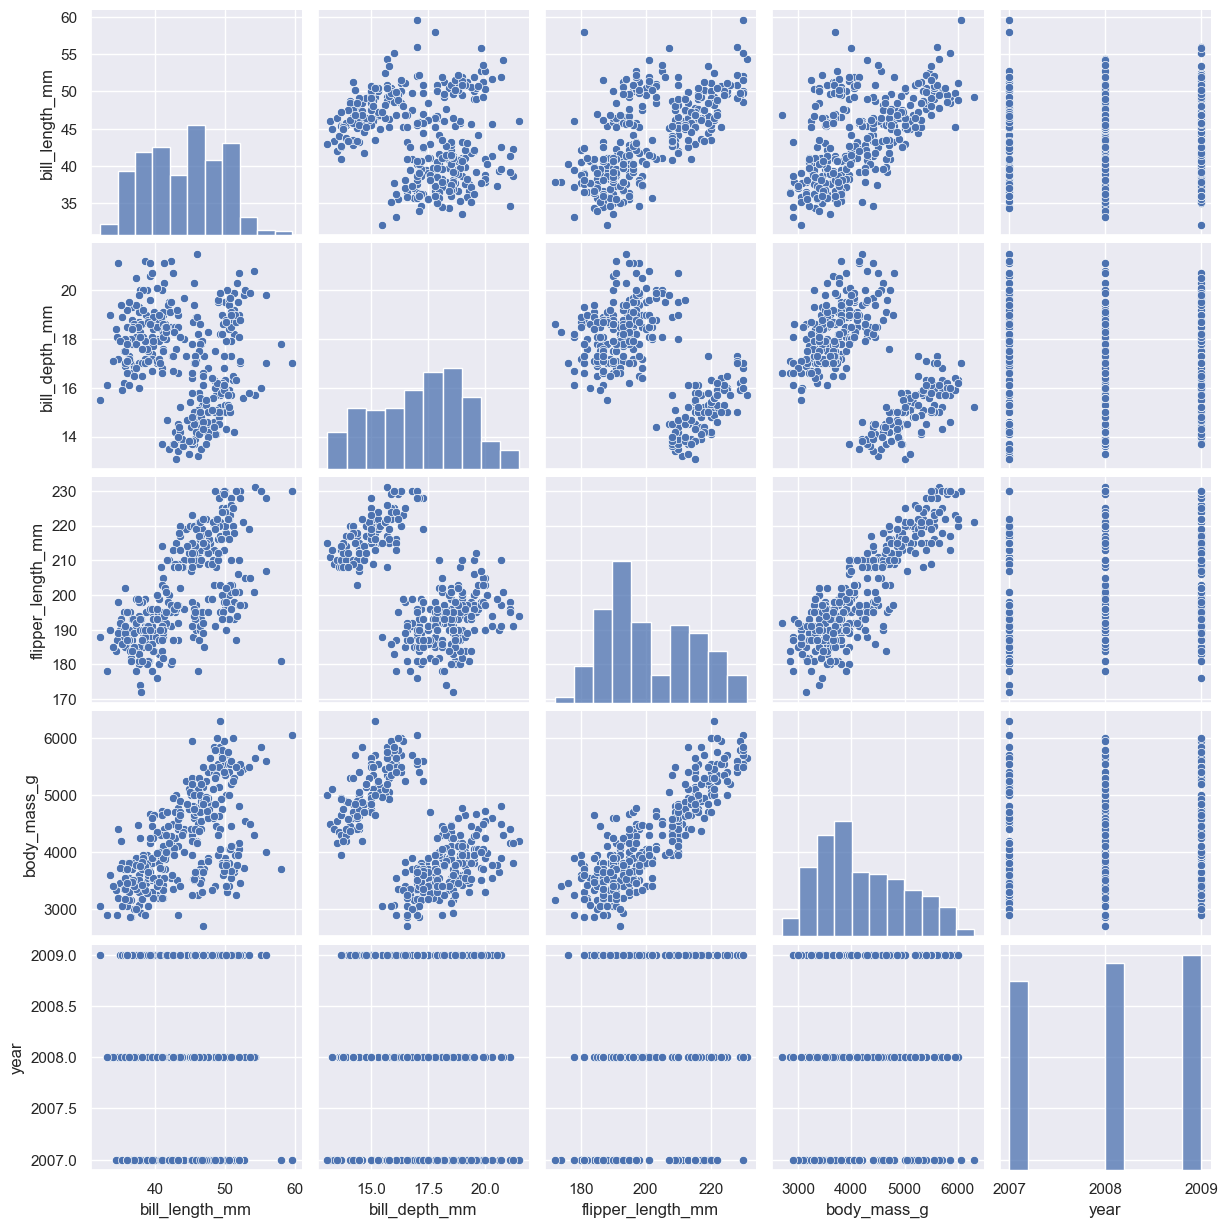

In [92]:
sns.pairplot(df)
plt.show()

We will try dropping an explanatory variable (flipper length) in order to help the model meet the multicollinearity condition.

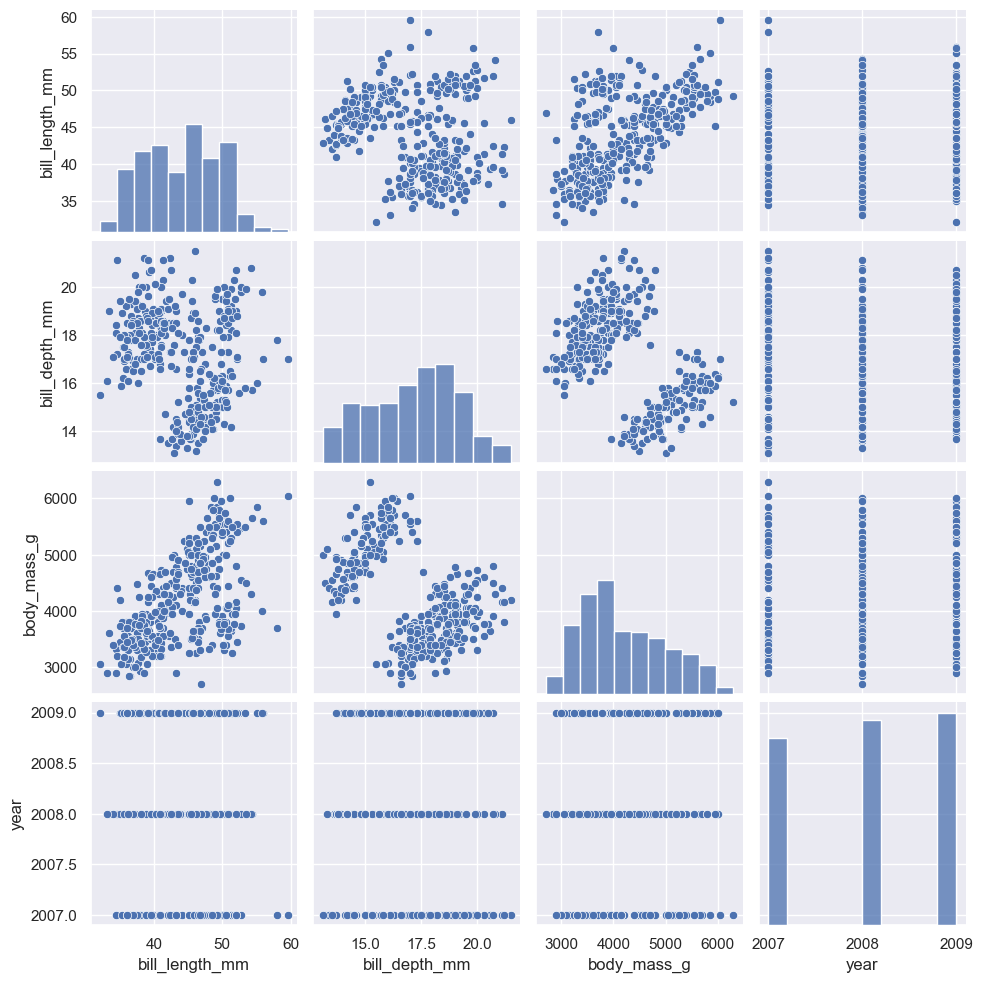

In [93]:
df.drop(columns = ["flipper_length_mm"], axis=1, inplace=True)
sns.pairplot(df)
plt.show()

In [95]:
linMod = smf.ols('body_mass_g ~ bill_length_mm + bill_depth_mm + sex', data=df).fit()
print(linMod.summary())
print("-----------")
print("Our Fitted Linear Regression Model: ")
print("yhat = 6551.4387 + 923.3052*sex + 36.5191*bill_length_mm - 257.3146*bill_depth_mm")

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     241.0
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.10e-82
Time:                        13:44:37   Log-Likelihood:                -2506.6
No. Observations:                 333   AIC:                             5021.
Df Residuals:                     329   BIC:                             5036.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6551.4387    394.408     16.

After dropping explanatory variable flipper_length_mm, our multicollinearity condition is still not met, so we will continue to proceed with caution. 

<u>**Percent Variability**</u><br>
Our percent variability in body mass explained by the model is 0.687, denoted by the R-squared value, which is average. This means about 68.7% of the variation in body mass can be explained by its linear relationship with the predictor variables flipper length, bill length, bill depth, and sex.

<u>**Prediction**</u><br>
A male penguin studied in 2007 with bill length 40 and bill depth 18 has an estimated body mass of about 4303.845 grams.

In [96]:
linMod.predict(exog=dict(bill_length_mm=40, bill_depth_mm=18, year=2007, sex="male"))

0    4303.845058
dtype: float64

<u>**Which slopes in our model do we have sufficient evidence to suggest are non-zero in the population model?**</u><br>
Firstly, our assumptions for hypothesis testing are met, since our multiple linear regression inference conditions hold, as shown previously. So we may proceed with valid interpretations and conclusions. We will conduct a hypothesis test with the following hypotheses:<br>
H0: B1 = B2 = ... = Bi = 0 <br>
Ha: at least one of Bi is nonzero <br>
where Bi is a slope in the model

In [97]:
linMod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     241.0
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.10e-82
Time:                        13:44:45   Log-Likelihood:                -2506.6
No. Observations:                 333   AIC:                             5021.
Df Residuals:                     329   BIC:                             5036.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6551.4387    394.408     16.611      0.000    5775.559    7327.318
sex[T.male]      923.3052     60.723     15.205      0.000     803.850    1042.760
bill_length_mm    36.5191      5.300      6.891      0.000      26.093      46.945
bill_depth_mm   -257.3146     14.892    -17.278      0.000    -286.611    -228.019
==============================================================================
Omnibus:                        0.670   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.692
Skew:                          -0.108   Prob(JB):                        0.708
Kurtosis:                       2.942   Cond. No.                         759.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary output tells us that the test statistic is 241.0 and the corresponding p-value is 1.10e-82. The two sets of degrees of freedom for this test are: 
- df1 = p = 3
- df2 = n - p - 1 = 333 - 3 - 1 - 329 <br>

Because the F-statistic is large enough and the p-value very small, at any reasonable a, we can reject the null. We have sufficient evidence to suggest that at least one of the four population slopes in the model predicting body mass with
sex, bill length, and bill depth is non‑zero.

<u>**Final Conclusion**</u><br>

Our linear regression analysis found that bill length, and bill depth, and sex were significant predictors of penguin body mass based on their respective t-values and p-values. For each variable, we found the following: <br>

Bill length: For each additional millimeter of bill length, we would expect an increase of 36.5191 grams in body mass, holding sex and bill depth constant. <br>
Bill depth: For each additional millimeter of bill depth, we would expect a decrease of 257.3146 grams in body mass, holding sex and bill length constant. <br>
Sex: Males were found to be significantly heavier than females, with an average weight difference of 923.3052 grams after controlling for bill length and bill depth. 

The overall model was also found to be significant, with an F-statistic of 241.0 and a p-value of < 0.001, indicating that the model as a whole provided a good fit to the data.

These findings help to answer our research question by providing evidence that bill length, bill depth, and sex are important predictors of penguin body mass. This suggests that those who want to estimate the body mass of penguins in the wild could use bill length, bill depth, and sex as reliable indicators of body mass. The fact that the overall model was also significant suggests that the combination of bill length, bill depth, and sex provides a better predictor of body mass than any variable alone. However, our analysis was conducted with caution, as our model did not fulfill the multicollinearity condition for linear regression. In addition, it is worth noting that our analysis was limited to Palmer penguins, and further research is needed to determine whether these findings generalize to other species or populations of penguins.


## 5. Logistic Regression

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 6. Conclusion